In [100]:
#Logistic Regression using PCA.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
import warnings
warnings.filterwarnings('ignore')
# Importing all datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_val = pd.read_csv('gender_submission.csv')
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [101]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_train=df_train.drop(['Cabin', 'Ticket','Name'],1)
df_train= df_train.dropna(axis=0, subset=['Embarked']) 
#df_train.dropna(how = "any", inplace = True)
df_train.fillna(0, inplace=True)
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [102]:
df_train['Sex'] = df_train['Sex'].astype('category')
df_train['Embarked'] = df_train['Embarked'].astype('category')

#df_train['Sex'] = df_train['Sex'].map({'male': 1, 'female': 0})
#df_test['Sex'] = df_test['Sex'].map({'male': 1, 'female': 0})

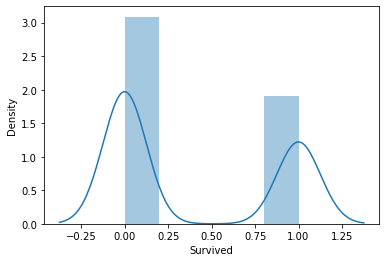

In [7]:
sns.distplot(df_train['Survived'])
plt.show()

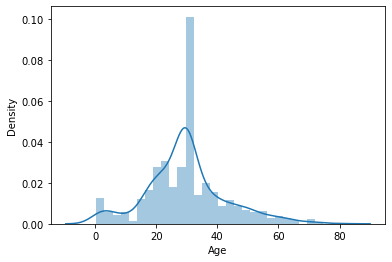

In [8]:
sns.distplot(df_train['Age'])
plt.show()

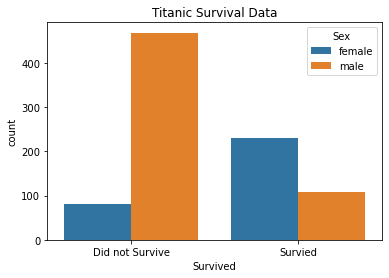

In [9]:
sns.countplot(data=df_train, x = 'Survived', hue='Sex').set(xticklabels = ['Did not Survive', 'Survied'], title = 'Titanic Survival Data')
plt.show()

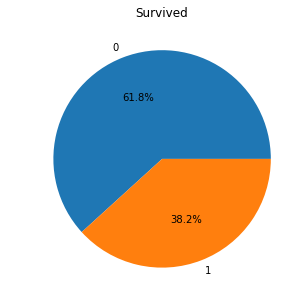

In [10]:
fig = plt.figure(figsize=(5,5))
df_train['Survived'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel(" ", fontsize = 15)
plt.title("Survived")
print("")

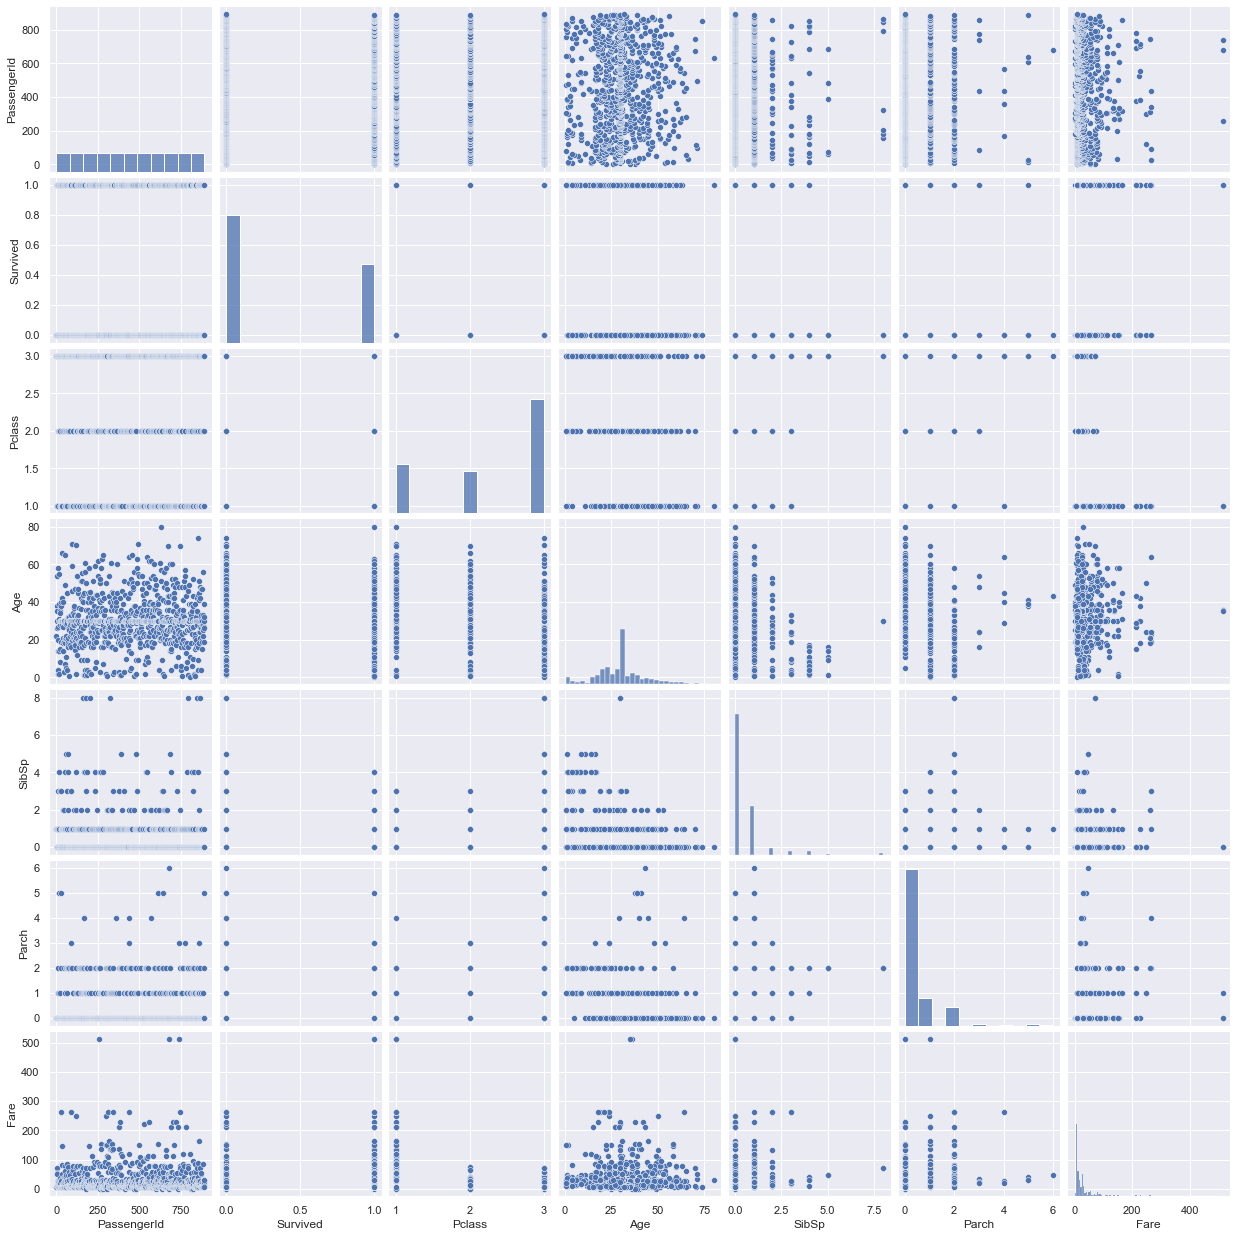

In [12]:
sns.set()
sns.pairplot(df_train)
plt.show()

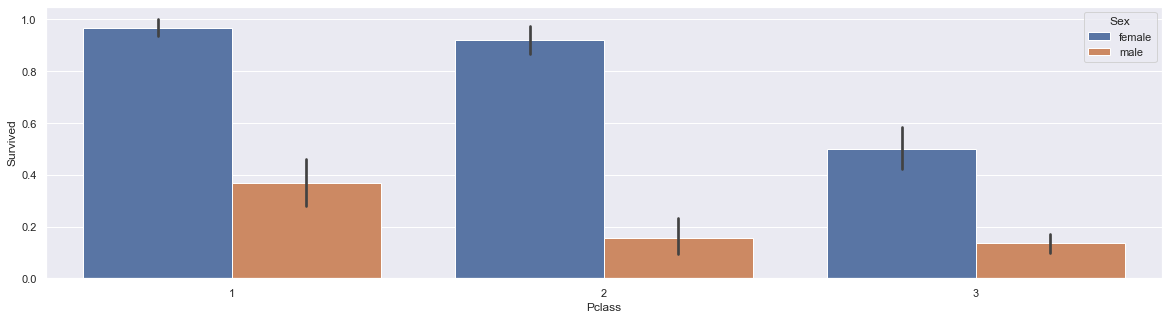

In [19]:
plt.figure(figsize=(20,5))
sns.barplot(x='Pclass',y='Survived',hue='Sex', data=df_train , estimator=np.mean)
plt.show()

In [15]:
#Dummy Variable Creation

In [103]:
Pclas = pd.get_dummies(df_train['Pclass'],prefix='Pclass',drop_first=True)
#Adding the results to the master dataframe
df_train = pd.concat([df_train,Pclas],axis=1)

# Creating a dummy variable for the variable 'Embarked' and dropping the first one.
Embark = pd.get_dummies(df_train['Embarked'],prefix='Embarked',drop_first=True)
#Adding the results to the master dataframe
df_train = pd.concat([df_train,Embark],axis=1)

# Creating a dummy variable for the variable 'SibSp' and dropping the first one.
#Sib = pd.get_dummies(df_train['SibSp'],prefix='SibSp',drop_first=True)
#Adding the results to the master dataframe
#df_train = pd.concat([df_train,Sib],axis=1)

# Creating a dummy variable for the variable 'SibSp' and dropping the first one.
Sex = pd.get_dummies(df_train['Sex'],prefix='Sex',drop_first=True)
#Adding the results to the master dataframe
df_train = pd.concat([df_train,Sex],axis=1)

In [43]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,1,0,3,male,22.0,1,0,7.2500,S,0,1,0,1,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,1,0,1,0
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,0,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,1,0,1,1


In [104]:
df_train = df_train.drop(['Embarked','Pclass','Sex'], 1)

In [105]:
# Checking for outliers in the continuous variables
num_df_train = df_train[['Fare','Age']]
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_df_train.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Fare,Age
count,889.000000,889.000000
mean,32.096681,29.653446
std,49.697504,12.968366
min,0.000000,0.420000
25%,7.895800,22.000000
50%,14.454200,29.699118
75%,31.000000,35.000000
90%,77.287500,47.000000
95%,112.318320,54.000000
99%,249.303304,65.000000


In [106]:
#Feature Standardisation
# Normalising continuous features
df = df_train[['Fare','Age']]
normalized_df=(df-df.mean())/df.std()
df_train = df_train.drop(['Fare','Age'], 1)
df_train = pd.concat([df_train,normalized_df],axis=1)
df_train

,PassengerId,Survived,SibSp,Parch,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,Fare,Age
0,1,0,1,0,0,1,0,1,1,-0.499958,-0.590163
1,2,1,1,0,0,0,0,0,0,0.788503,0.643609
2,3,1,0,0,0,1,0,1,0,-0.486376,-0.281720
3,4,1,1,0,0,0,0,1,0,0.422623,0.412277
4,5,0,0,0,0,1,0,1,1,-0.483861,0.412277
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,0,1,0,0,1,1,-0.384258,-0.204609
887,888,1,0,0,0,0,0,1,0,-0.042189,-0.821495
888,889,0,1,2,0,1,0,1,0,-0.173986,0.003522
889,890,1,0,0,0,0,0,0,1,-0.042189,-0.281720


In [124]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
import warnings
warnings.filterwarnings('ignore')

df_train = pd.read_csv('train.csv')

df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_train=df_train.drop(['Cabin', 'Ticket','Name'],1)
df_train= df_train.dropna(axis=0, subset=['Embarked']) 
df_train.fillna(0, inplace=True)

df_train['Sex'] = df_train['Sex'].astype('category')
df_train['Embarked'] = df_train['Embarked'].astype('category')

Pclas = pd.get_dummies(df_train['Pclass'],prefix='Pclass',drop_first=True)
#Adding the results to the master dataframe
df_train = pd.concat([df_train,Pclas],axis=1)

# Creating a dummy variable for the variable 'Embarked' and dropping the first one.
Embark = pd.get_dummies(df_train['Embarked'],prefix='Embarked',drop_first=True)
#Adding the results to the master dataframe
df_train = pd.concat([df_train,Embark],axis=1)
# Creating a dummy variable for the variable 'SibSp' and dropping the first one.
#Sib = pd.get_dummies(df_train['SibSp'],prefix='SibSp',drop_first=True)
#Adding the results to the master dataframe
#df_train = pd.concat([df_train,Sib],axis=1)
# Creating a dummy variable for the variable 'SibSp' and dropping the first one.
Sex = pd.get_dummies(df_train['Sex'],prefix='Sex',drop_first=True)
#Adding the results to the master dataframe
df_train = pd.concat([df_train,Sex],axis=1)

df_train = df_train.drop(['Embarked','Pclass','Sex'], 1)

num_df_train = df_train[['Fare','Age']]
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_df_train.describe(percentiles=[.25,.5,.75,.90,.95,.99])

#Feature Standardisation
# Normalising continuous features
df = df_train[['Fare','Age']]
normalized_df=(df-df.mean())/df.std()
df_train = df_train.drop(['Fare','Age'], 1)
df_train = pd.concat([df_train,normalized_df],axis=1)
#Model Building
from sklearn.model_selection import train_test_split

df_train =df_train.drop(['Embarked_Q','Pclass_2'],1)
# Putting feature variable to X
X = df_train.drop(['Survived','PassengerId'],axis=1)

# Putting response variable to y
y = df_train['Survived']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,test_size=0.2,random_state=100)



from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg,9)             
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[ True  True  True  True  True  True  True]
[1 1 1 1 1 1 1]


In [125]:
#from sklearn.metrics import f1_score
#train_predict = rfe.predict(X_train)
#train_k = f1_score(train_predict, y_train)
#print("Train f1_score:",train_k)
#test_predict = rfe.predict(X_test)
#k = f1_score(test_predict, y_test)
#print('Test f1_score:', k )

from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

#fit
clf = svm.SVC(kernel='poly',degree=1)
clf.fit(X_train, y_train) 

#predict and score
train_predict = clf.predict(X_train)
train_f1 = f1_score(train_predict,y_train)
#train_js = jaccard_score(train_predict, train_y,pos_label=1)
print("Train f1_score and Jaccard_index are:",train_f1)

test_predict = clf.predict(X_test)
test_f1 = f1_score(test_predict, y_test)
#test_js = jaccard_score(test_predict, test_y,pos_label=1)
print('Test f1_score and Jaccard_index are:', test_f1)

Train f1_score and Jaccard_index are: 0.7058823529411764
Test f1_score and Jaccard_index are: 0.72


In [126]:
df_train = pd.read_csv('test.csv')

df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_train=df_train.drop(['Cabin', 'Ticket','Name'],1)
#df_train= df_train.dropna(axis=0, subset=['Embarked']) 
df_train.fillna(0, inplace=True)

df_train['Sex'] = df_train['Sex'].astype('category')
df_train['Embarked'] = df_train['Embarked'].astype('category')

Pclas = pd.get_dummies(df_train['Pclass'],prefix='Pclass',drop_first=True)
#Adding the results to the master dataframe
df_train = pd.concat([df_train,Pclas],axis=1)

# Creating a dummy variable for the variable 'Embarked' and dropping the first one.
Embark = pd.get_dummies(df_train['Embarked'],prefix='Embarked',drop_first=True)
#Adding the results to the master dataframe
df_train = pd.concat([df_train,Embark],axis=1)
# Creating a dummy variable for the variable 'SibSp' and dropping the first one.
#Sib = pd.get_dummies(df_train['SibSp'],prefix='SibSp',drop_first=True)
#Adding the results to the master dataframe
#df_train = pd.concat([df_train,Sib],axis=1)
# Creating a dummy variable for the variable 'SibSp' and dropping the first one.
Sex = pd.get_dummies(df_train['Sex'],prefix='Sex',drop_first=True)
#Adding the results to the master dataframe
df_train = pd.concat([df_train,Sex],axis=1)

df_train = df_train.drop(['Embarked','Pclass','Sex'], 1)

num_df_train = df_train[['Fare','Age']]
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_df_train.describe(percentiles=[.25,.5,.75,.90,.95,.99])

#Feature Standardisation
# Normalising continuous features
df = df_train[['Fare','Age']]
normalized_df=(df-df.mean())/df.std()
df_train = df_train.drop(['Fare','Age'], 1)
df_train = pd.concat([df_train,normalized_df],axis=1)

#Model Building
from sklearn.model_selection import train_test_split
df_train =df_train.drop(['Embarked_Q','Pclass_2'],1)
# Putting feature variable to X
X = df_train.drop(['PassengerId'],axis=1)
# Putting response variable to y


test_unknown_predict=rfe.predict(X)
test=pd.read_csv("test.csv")
dff=pd.DataFrame({"PassengerId":test["PassengerId"],"Survived":test_unknown_predict})
dff.to_csv("submission9_svm_new.csv",index=False)